In [1]:
# Importing Dependencies
import pandas as pd
import requests
from bs4 import BeautifulSoup
import Links as ls
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
# Importing Batting URLs
print(ls.Team_Pitching_2024_url)
print(ls.Team_Pitching_2007_url)

https://www.baseball-reference.com/teams/COL/2024.shtml#team_pitching
https://www.baseball-reference.com/teams/COL/2007.shtml#team_pitching


In [3]:
url = ls.Team_Pitching_2024_url
response= requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')
tb = soup.find("table",id='team_pitching')
df = pd.read_html(str(tb))[0]
df.head(34)

C:\Users\elcoo\AppData\Local\Temp\ipykernel_4180\1348791437.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(tb))[0]


,Rk,Pos,Name,Age,W,L,W-L%,ERA,G,GS,...,WP,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W
0,1,SP,Cal Quantrill,29,6,7,.462,4.13,19,19,...,4,434,111,4.76,1.349,8.7,1.2,3.4,6.9,2.00
1,2,SP,Ryan Feltner,27,1,9,.100,5.36,19,19,...,2,449,85,3.99,1.446,10.1,1.1,2.9,8.0,2.76
2,3,SP,Austin Gomber*,30,2,6,.250,4.61,18,18,...,3,417,100,4.92,1.304,9.5,1.6,2.3,6.1,2.68
3,4,SP,Dakota Hudson,29,2,12,.143,5.84,17,17,...,3,391,79,5.33,1.645,10.0,1.0,4.8,5.0,1.04
4,5,SP,Ty Blach*,33,3,5,.375,5.46,16,9,...,1,268,84,5.13,1.584,12.3,1.5,2.0,4.9,2.46
5,6,SP,Kyle Freeland*,31,1,3,.250,6.00,8,8,...,1,190,77,4.28,1.619,11.8,1.1,2.8,6.4,2.31
6,Rk,Pos,Name,Age,W,L,W-L%,ERA,G,GS,...,WP,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W
7,7,CL,Jalen Beeks*,30,5,4,.556,4.89,42,0,...,5,199,94,4.25,1.391,9.0,1.0,3.5,7.0,2.00
8,8,RP,Victor Vodnik,24,2,1,.667,4.11,41,0,...,4,220,112,4.06,1.470,9.1,0.9,4.1,8.2,2.00
9,9,RP,Nick Mears,27,1,4,.200,5.95,39,0,...,3,194,77,2.81,1.606,10.0,0.4,4.5,11.1,2.48


In [12]:
url = ls.Team_Pitching_2007_url
response= requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')
tb = soup.find("table",id='team_pitching')
df = pd.read_html(str(tb))[0]
df.head(35)


C:\Users\elcoo\AppData\Local\Temp\ipykernel_4180\3835455823.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(tb))[0]


,Rk,Pos,Name,Age,W,L,W-L%,ERA,G,GS,...,WP,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W
0,1,SP,Jeff Francis*,26,17,9,.654,4.22,34,34,...,1,922,114,4.19,1.379,9.8,1.0,2.6,6.9,2.62
1,2,SP,Aaron Cook,28,8,7,.533,4.12,25,25,...,0,698,117,4.58,1.337,9.7,0.8,2.4,3.3,1.39
2,3,SP,Josh Fogg,30,10,9,.526,4.94,30,29,...,3,745,97,5.21,1.527,10.5,1.2,3.2,5.1,1.59
3,4,SP,Jason Hirsh,25,5,7,.417,4.81,19,19,...,5,483,100,5.32,1.344,8.3,1.4,3.8,6.0,1.56
4,5,SP,Ubaldo Jiménez,23,4,4,.500,4.28,15,15,...,3,354,112,4.74,1.305,7.7,1.1,4.1,7.5,1.84
5,6,SP,Rodrigo López,31,5,4,.556,4.42,14,14,...,0,333,109,4.75,1.311,9.4,1.2,2.4,4.9,2.05
6,Rk,Pos,Name,Age,W,L,W-L%,ERA,G,GS,...,WP,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W
7,7,CL,Brian Fuentes*,31,3,5,.375,3.08,64,0,...,2,255,156,4.15,1.125,6.8,0.9,3.4,8.2,2.43
8,8,RP,Manny Corpas,24,4,2,.667,2.08,78,0,...,0,306,232,3.60,1.064,7.3,0.7,2.3,6.7,2.90
9,9,RP,Jeremy Affeldt*,28,4,3,.571,3.51,75,0,...,6,253,137,4.17,1.356,7.2,0.5,5.0,7.0,1.39


In [5]:
# Defining a function to pull information from batting tables into a pandas dataframe.

def get_pitching_table(x,y):
    """
    Retrieves and parses an HTML table from a specified URL.

    Parameters:
    - x (str): URL of the webpage containing the HTML table.
    - y (str): ID of the HTML table to be extracted from the webpage.

    Returns:
    - df (pandas dataframe): Cleaned and processed DataFrame containing numeric data from the 
        specified HTML table.
    
    This function performs the following steps:
    1. Sends a GET request to the provided URL.
    2. Parses the HTML content using BeautifulSoup.
    3. Finds the table element with the specified ID.
    4. Converts the HTML table into a pandas DataFrame using pd.read_html().
    5. Converts numeric columns (excluding 'Pos' and 'Name') to numeric type.
    6. Drops rows with any NaN values.
    7. Returns the cleaned DataFrame.
    """

    
    # Finding the table with the specified url (x) and id (y)
    response=requests.get(x)
    soup= BeautifulSoup(response.content, 'html.parser')
    s = soup.find("table",id=y)

    # Converting html to a pandas dataframe
    df = pd.read_html(str(s))[0]
    
    # Convert columns to numeric type, ignoring Position (POS) and Name (Name) which should remain strings. 
    for col in df.columns:
        if col == "Pos":
            pass
        elif col == "Name":
            pass
        else:
            df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # Returning the df created for use outside of the function.
    return df


In [19]:
# Using the get_batting_table function to pull in the batting table from the Links (ls) file.

pitching_2007= get_pitching_table(ls.Team_Pitching_2007_url,"team_pitching")
pitching_2024= get_pitching_table(ls.Team_Pitching_2024_url,"team_pitching")


C:\Users\elcoo\AppData\Local\Temp\ipykernel_4180\4114799816.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(s))[0]
C:\Users\elcoo\AppData\Local\Temp\ipykernel_4180\4114799816.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(s))[0]


In [22]:
# FILTER rows to include only starting pitchers (Pos = SP)
pitching_2007_SP = pitching_2007[pitching_2007['Pos'] == 'SP']
pitching_2024_SP = pitching_2024[pitching_2024['Pos'] == 'SP']

# display starting pitcher rosters per each year
display(pitching_2007_SP.head(8))
display(pitching_2024_SP.head(8))

,Rk,Pos,Name,Age,W,L,W-L%,ERA,G,GS,...,WP,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W
0,1.0,SP,Jeff Francis*,26.0,17.0,9.0,0.654,4.22,34.0,34.0,...,1.0,922.0,114.0,4.19,1.379,9.8,1.0,2.6,6.9,2.62
1,2.0,SP,Aaron Cook,28.0,8.0,7.0,0.533,4.12,25.0,25.0,...,0.0,698.0,117.0,4.58,1.337,9.7,0.8,2.4,3.3,1.39
2,3.0,SP,Josh Fogg,30.0,10.0,9.0,0.526,4.94,30.0,29.0,...,3.0,745.0,97.0,5.21,1.527,10.5,1.2,3.2,5.1,1.59
3,4.0,SP,Jason Hirsh,25.0,5.0,7.0,0.417,4.81,19.0,19.0,...,5.0,483.0,100.0,5.32,1.344,8.3,1.4,3.8,6.0,1.56
4,5.0,SP,Ubaldo Jiménez,23.0,4.0,4.0,0.500,4.28,15.0,15.0,...,3.0,354.0,112.0,4.74,1.305,7.7,1.1,4.1,7.5,1.84
5,6.0,SP,Rodrigo López,31.0,5.0,4.0,0.556,4.42,14.0,14.0,...,0.0,333.0,109.0,4.75,1.311,9.4,1.2,2.4,4.9,2.05


,Rk,Pos,Name,Age,W,L,W-L%,ERA,G,GS,...,WP,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W
0,1.0,SP,Cal Quantrill,29.0,6.0,7.0,0.462,4.13,19.0,19.0,...,4.0,434.0,111.0,4.76,1.349,8.7,1.2,3.4,6.9,2.00
1,2.0,SP,Ryan Feltner,27.0,1.0,9.0,0.100,5.36,19.0,19.0,...,2.0,449.0,85.0,3.99,1.446,10.1,1.1,2.9,8.0,2.76
2,3.0,SP,Austin Gomber*,30.0,2.0,6.0,0.250,4.61,18.0,18.0,...,3.0,417.0,100.0,4.92,1.304,9.5,1.6,2.3,6.1,2.68
3,4.0,SP,Dakota Hudson,29.0,2.0,12.0,0.143,5.84,17.0,17.0,...,3.0,391.0,79.0,5.33,1.645,10.0,1.0,4.8,5.0,1.04
4,5.0,SP,Ty Blach*,33.0,3.0,5.0,0.375,5.46,16.0,9.0,...,1.0,268.0,84.0,5.13,1.584,12.3,1.5,2.0,4.9,2.46
5,6.0,SP,Kyle Freeland*,31.0,1.0,3.0,0.250,6.00,8.0,8.0,...,1.0,190.0,77.0,4.28,1.619,11.8,1.1,2.8,6.4,2.31


[Text(0, 0, 'Jeff Francis*'),
 Text(1, 0, 'Aaron Cook'),
 Text(2, 0, 'Josh Fogg'),
 Text(3, 0, 'Jason Hirsh'),
 Text(4, 0, 'Ubaldo Jiménez'),
 Text(5, 0, 'Rodrigo López')]

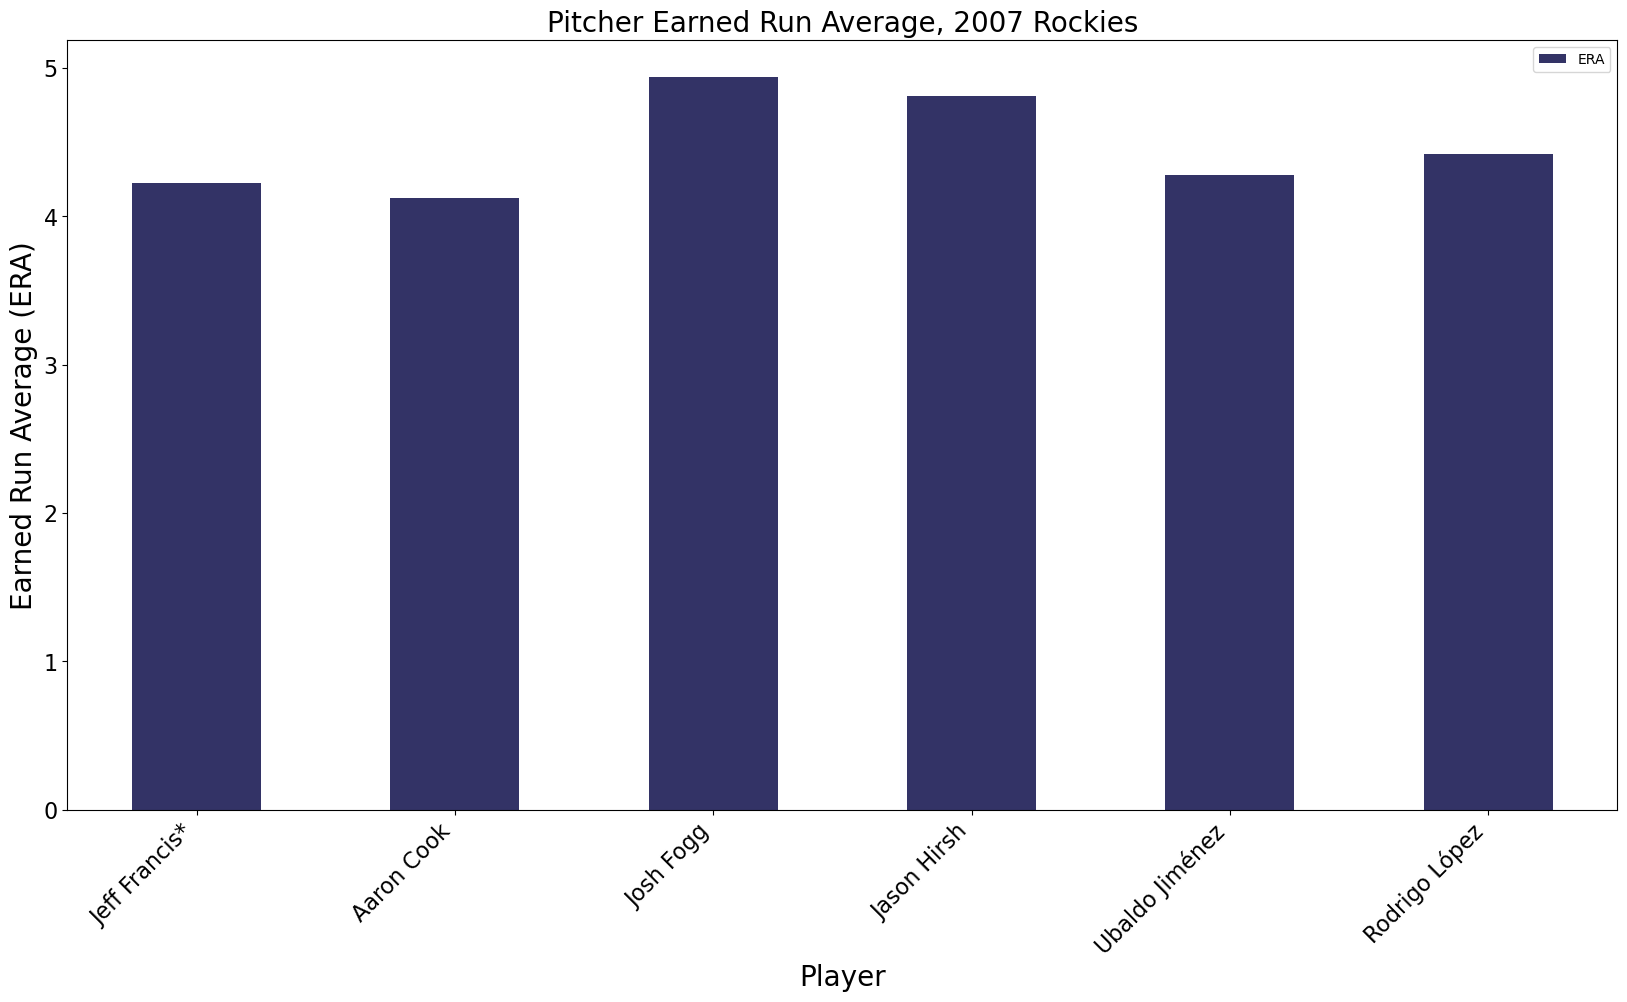

In [23]:
# Plotting the '07 batting data in a bar chart to view players and their on base percentage.
pitching_ERA_fig1=pitching_2007_SP.plot(x="Name",
                  y="ERA",
                  kind="bar",                  
                  figsize= [20,10],
                  fontsize=16,
                  color=ls.Rockies_Purple_Hex)
pitching_ERA_fig1.set_ylabel('Earned Run Average (ERA)', fontsize=20)
pitching_ERA_fig1.set_xlabel('Player', fontsize=20,)
pitching_ERA_fig1.set_title("Pitcher Earned Run Average, 2007 Rockies", fontsize=20)
pitching_ERA_fig1.set_xticklabels(pitching_ERA_fig1.get_xticklabels(), rotation=45, ha='right')



[Text(0, 0, 'Cal Quantrill'),
 Text(1, 0, 'Ryan Feltner'),
 Text(2, 0, 'Austin Gomber*'),
 Text(3, 0, 'Dakota Hudson'),
 Text(4, 0, 'Ty Blach*'),
 Text(5, 0, 'Kyle Freeland*')]

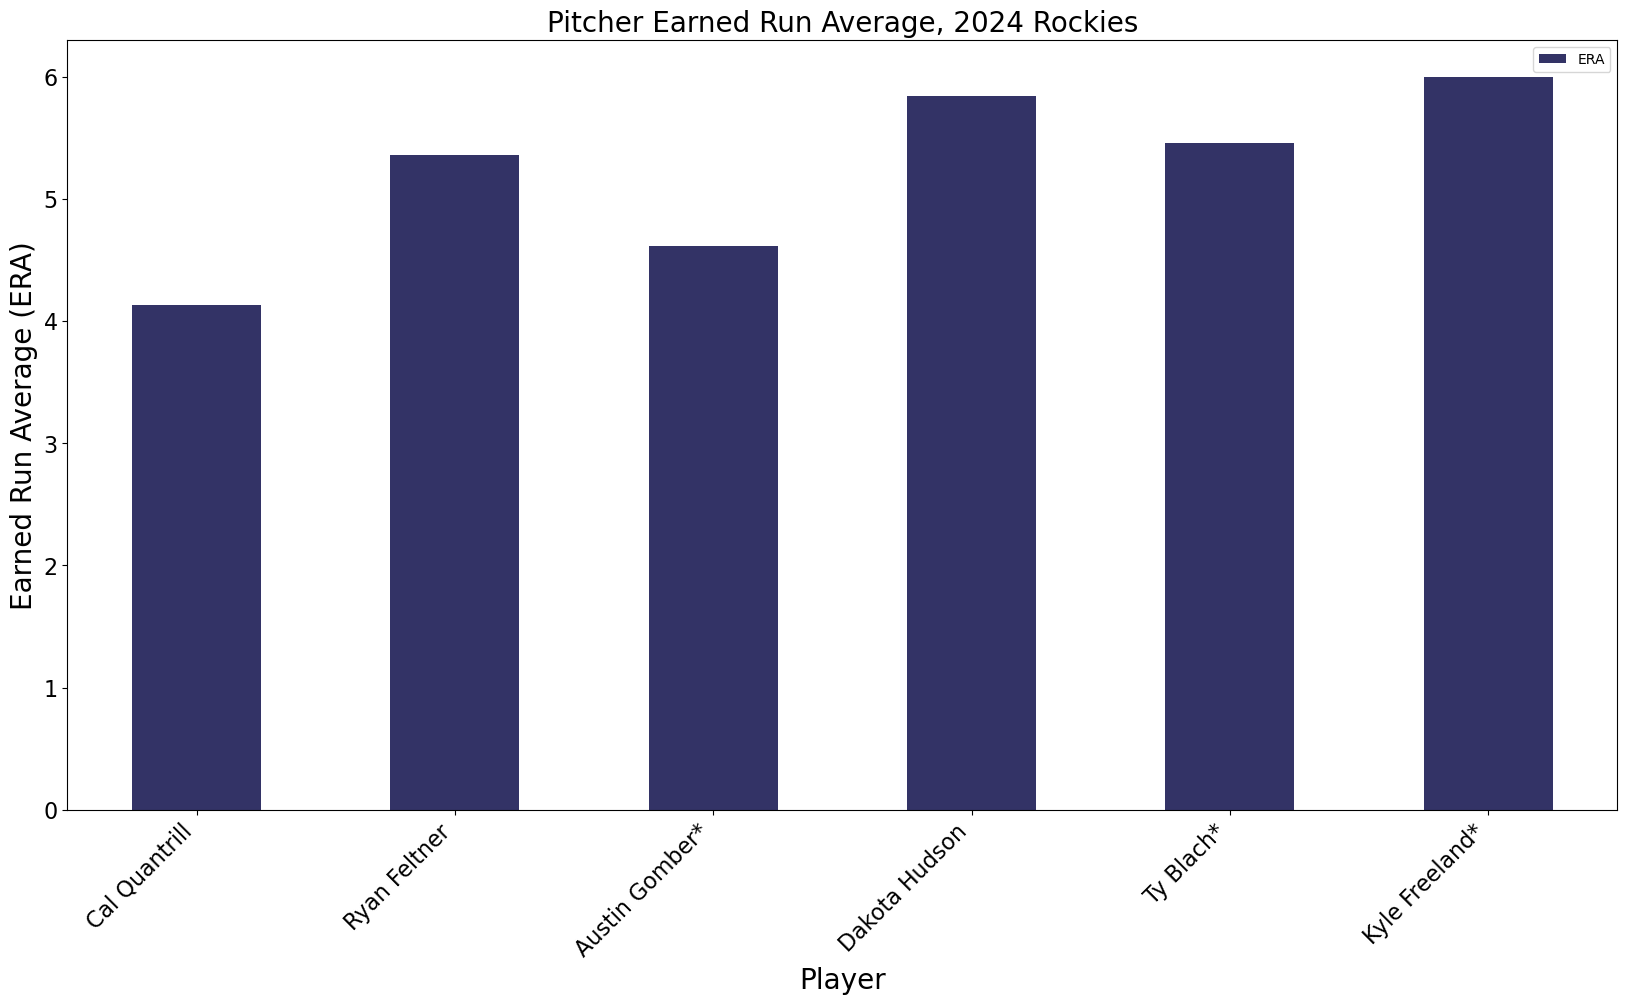

In [24]:
# Plotting the '07 batting data in a bar chart to view players and their on base percentage.
pitching_ERA_fig2=pitching_2024_SP.plot(x="Name",
                  y="ERA",
                  kind="bar",                  
                  figsize= [20,10],
                  fontsize=16,
                  color=ls.Rockies_Purple_Hex)
pitching_ERA_fig2.set_ylabel('Earned Run Average (ERA)', fontsize=20)
pitching_ERA_fig2.set_xlabel('Player', fontsize=20,)
pitching_ERA_fig2.set_title("Pitcher Earned Run Average, 2024 Rockies", fontsize=20)
pitching_ERA_fig2.set_xticklabels(pitching_ERA_fig2.get_xticklabels(), rotation=45, ha='right')



In [27]:
# Finding and printing the ERA between the two years
print(f"The average Earned Run Average for 2007 starting pitchers was {pitching_2007_SP['ERA'].mean():,.2f},\n" 
      f"while in 2024, the Earned Run Average for starting pitchers is {pitching_2024_SP['ERA'].mean():,.2f}.")

The average Earned Run Average for 2007 starting pitchers was 4.46,
while in 2024, the Earned Run Average for starting pitchers is 5.23.


In [ ]:
# Prepping the data to be concatnated.

#Adding a column to signal which year the data is from and making sure that both columns were added correctly.

batting_2007["Year"]=2007
batting_2024["Year"]=2024

# Verification methods
# display(batting_2007.head(3))
# display(batting_2007.columns)
# display(batting_2007.dtypes)
# display(batting_2024.head(3))
# display(batting_2024.columns)
# display(batting_2024.dtypes)

In [ ]:
# Concatnating the data on index.
batting_2007=batting_2007.reset_index(drop=True)
batting_2024=batting_2024.reset_index(drop=True)
batting_combined=pd.concat([batting_2007,batting_2024])
display(batting_combined.head(5))
display(batting_combined.tail(5))


In [ ]:
# Verifying concat worked and no columns were repeated incorrectly
batting_combined=batting_combined.drop(columns=["Name"])
print(batting_combined.columns)

In [ ]:
# Grouping the combined data frame by position. One for averages and one for sums.
grouped_df_pos_mean= batting_combined.groupby(["Pos","Year"]).mean().reset_index()
grouped_df_pos_mean.head(15)
grouped_df_pos_sum= batting_combined.groupby(["Pos","Year"]).sum().reset_index()
grouped_df_pos_sum.head(15)

In [ ]:
# Defining a function that will make and return a pivot table based on inputs.
def make_batting_pivot(g_df,ind,col,val):
    """
    Create a pivot table from a DataFrame.

    Parameters:
    g_df (grouped pandas dataframe, variable): Input DataFrame to pivot.

    ind(str): Column name to use as the index (rows) in the pivot table.

    col (str): Column name to use as the columns in the pivot table.

    val (str): Column name to use for values in the pivot table.

    Returns:
        pivot_df: Pivot table dataframe.

    """
    pivot_df=g_df.pivot(index=ind,
                        columns=col,
                        values=val)
    return pivot_df

In [ ]:
# Using the make_batting_pivot function to create a pivot for OBP
grouped_obp_piv=make_batting_pivot(g_df=grouped_df_pos_mean,
                                                  ind="Pos",
                                                  col="Year",
                                                  val="OBP")
grouped_obp_piv.head()

In [ ]:
# Making a dictionary to hold the rockies colors for viewing easier in a bar chart.
colors={2007:ls.Rockies_Purple_Hex,2024:ls.Rockies_Silver_Hex}

In [ ]:
# Creating a bar chart to show OBP by position between the two years.
batting_fig3=grouped_obp_piv.plot(kind="bar",
                     color=colors,
                     xlabel="Position",
                     ylabel="On Base Percentage (OBP)",
                     title="On Base Percentage by Position")

In [ ]:
# Creating a new dataframe to plot RBIs.
rbi_grouped=grouped_df_pos_sum
# Adding a new row that adjusts the total RBIs based on the number of games played.
rbi_grouped["Adjusted RBI"]=rbi_grouped["RBI"]/rbi_grouped["G"]
grouped_rbi_piv=make_batting_pivot(g_df=rbi_grouped,
                                   ind="Pos",
                                   col="Year",
                                   val="Adjusted RBI")
# Plotting the RBIs per game for each year.
batting_fig4=grouped_rbi_piv.plot(kind="bar",
                     color=colors,
                     xlabel="Position",
                     ylabel="Adjusted Runs Batted In (RBI)",
                     title="Runs Batted In per Games Played by Position")

In [ ]:
# Saving Figures

# Creating a list holding all of the figures. Can be appended for more that get created.
figs=[batting_fig1,batting_fig2,batting_fig3,batting_fig4]

# Defining a function that dynamically saves the figures based on their title
def save_figure_func(f,title):
    """
    Save a figure "f" as a PNG file.

    Parameters:
        f (variable): variable that holds a figure.
        title (str): the title used for the PNG file.
            
    """
    png=".png"
    f.get_figure().savefig(f"../Test_files/Batting_Figures/{title}{png}")

# For loop that loops through the figs list and saves each one using the save_figure_func function.
for fig in figs:
    save_figure_func(fig,fig.get_title())

In [ ]:
# batting_combined

In [ ]:
# display(col_batting_sum.tail())
# display(col_batting_sum.head())

In [ ]:
# Creating a correlation dataframe to run a correlation matrix. 
# Grabbing nescessary columns from the sum groupby df and renaming them for understandability.
col_batting_sum=grouped_df_pos_sum[["G","AB","R","H","SO"]].rename(columns={"G":"Total Games","AB": "Average At Bats","R":"Average Runs","H":"Average Hits","SO":"Average Strike Outs" })
# Properly calculating the data based on the number of games played, so its an average per game to accound for differences in season length currently.
for col in col_batting_sum:
    if col !="Total Games":
      col_batting_sum[col] = col_batting_sum[col]/ col_batting_sum["Total Games"]
# Grabbing nescessary columns from the average groupby df and renaming them for understandability.
col_batting_avg=grouped_df_pos_mean[["Age","BA","OBP"]].rename(columns={"Age":"Average Age","BA":"Average BA","OBP":"Average OBP"})

# Merging the dataframes.
corr_batting=pd.merge(col_batting_avg,col_batting_sum,left_index=True,right_index=True)

# Getting the correlation info based on pearson's coefficients.
corr_batting.corr("pearson")

In [ ]:
correlation_matrix=sb.heatmap(corr_batting.corr("pearson"), 
                              cmap="Purples",
                              linewidths=.7
                              )

plt.title("Correlation Matrix")
plt.figure(figsize=(10, 10))
batting_fig5=plt.gcf()
figs.append(batting_fig5)

plt.show()
plt.savefig("../Test_files/Batting_Figures/Batting Correlation Matrix.png")